# 🧠 BRAIN TUMOR DETECTION MODEL USING YOLOv11 🦠


## 📦 Importing Required Libraries

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO
import cv2
import numpy as np
import random

## ⚙️ Configuration and Hyperparameters

In [ ]:
DATASET_PATH = 'dataset'
YAML_FILE = os.path.join(DATASET_PATH, 'data.yaml')

MODEL_NAME = 'yolo11n.pt'
EPOCHS = 500
IMG_SIZE = 640
# BATCH_SIZE = 16
CONF_THRESHOLD = 0.25
IOU_THRESHOLD = 0.45

Project_Name = 'Brain Tumor Detection'
RUN_NAME = 'YOLOv12_'

TRAIN_PROJECT_NAME = Project_Name
TRAIN_RUN_NAME = 'train_'+RUN_NAME

PREDICT_PROJECT_NAME = Project_Name
PREDICT_RUN_NAME = 'prediction_'+RUN_NAME

num_images_to_predict = 10

## 🏋️ Training the YOLOv11 Model

🤖 Defining Model 📦

In [ ]:
model = YOLO("yolov12n.pt", task='detect')

🧑‍🏫 Training 🏃‍♂️

In [4]:
results = model.train(
    data=YAML_FILE,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    # batch=BATCH_SIZE,
    project=TRAIN_PROJECT_NAME,
    name=TRAIN_RUN_NAME,
    amp=True,
    patience=16,
    pretrained=True,
    optimizer='auto',
    optimize=True,
)

print("Training finished. Model saved to:", model.trainer.save_dir)

BEST_MODEL_PATH = os.path.join(model.trainer.save_dir, 'weights', 'best.pt')
print("Best model weights path:", BEST_MODEL_PATH)

New https://pypi.org/project/ultralytics/8.3.172 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 11913MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_YOLOv11_, nbs=64, nms=False, opset=None, o

train: Scanning /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/train/labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 209.3±102.5 MB/s, size: 34.0 KB)


val: Scanning /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]


Plotting labels to Brain Tumor Detection/train_YOLOv11_/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Brain Tumor Detection/train_YOLOv11_
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.28G      1.338      3.578      1.437         30        640: 100%|██████████| 134/134 [00:17<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.55it/s]


                   all        612        612      0.472      0.226      0.155     0.0998

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.76G      1.351      2.537      1.438         33        640: 100%|██████████| 134/134 [00:16<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.83it/s]

                   all        612        612      0.597      0.522      0.567      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.76G      1.331      2.043      1.419         26        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.20it/s]

                   all        612        612      0.548      0.459      0.434      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.78G      1.297      1.714      1.392         25        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.36it/s]

                   all        612        612      0.625      0.488       0.55      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.79G      1.276      1.616       1.38         31        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.58it/s]

                   all        612        612      0.676      0.622      0.639      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.79G      1.238      1.493      1.352         35        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.55it/s]

                   all        612        612      0.686      0.626      0.693      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.79G      1.236      1.458      1.332         19        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.59it/s]

                   all        612        612      0.698      0.663      0.687      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.8G      1.193      1.358      1.313         31        640: 100%|██████████| 134/134 [00:16<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.689      0.668      0.698      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.8G      1.169      1.307      1.299         25        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]

                   all        612        612      0.791      0.705      0.772      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.8G      1.169      1.255      1.295         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.765       0.75      0.783      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.8G      1.132      1.229      1.284         28        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.763      0.727      0.787      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.8G       1.12      1.177      1.272         27        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.52it/s]

                   all        612        612      0.756      0.718      0.779      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.8G      1.125      1.176      1.279         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.57it/s]

                   all        612        612      0.767      0.711      0.774      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.8G      1.089      1.109       1.25         32        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.61it/s]

                   all        612        612      0.805      0.815      0.852      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.8G      1.112      1.102      1.261         29        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.799      0.709      0.794      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.8G      1.098      1.097      1.255         22        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.70it/s]

                   all        612        612      0.776      0.699      0.781      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.8G      1.081      1.051      1.241         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]

                   all        612        612      0.796       0.79      0.846      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.8G      1.064      1.002      1.217         22        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.869      0.789      0.865      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.8G      1.049     0.9858      1.214         27        640: 100%|██████████| 134/134 [00:16<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.57it/s]

                   all        612        612      0.817       0.77      0.845      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.8G      1.049     0.9691      1.213         29        640: 100%|██████████| 134/134 [00:16<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.61it/s]

                   all        612        612      0.808      0.805      0.842      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.8G      1.044      0.963      1.221         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.57it/s]

                   all        612        612      0.823      0.793      0.857      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.8G       1.04     0.9581      1.219         28        640: 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.63it/s]

                   all        612        612      0.826      0.807       0.86       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.8G      1.009     0.9006      1.192         35        640: 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]

                   all        612        612      0.842      0.814       0.87      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.8G      1.017     0.9355      1.201         21        640: 100%|██████████| 134/134 [00:16<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.12it/s]

                   all        612        612      0.843      0.798      0.873      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.8G      1.012     0.9222      1.196         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.825      0.834      0.852      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.8G      1.005      0.894      1.199         29        640: 100%|██████████| 134/134 [00:16<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612      0.869      0.797      0.864      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.8G     0.9914     0.8916      1.186         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.62it/s]

                   all        612        612      0.878       0.83      0.898      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.8G     0.9719     0.8929      1.181         26        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.861      0.837      0.892      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.8G     0.9788     0.8494      1.165         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.857      0.834      0.888      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.8G      0.973     0.8412      1.168         25        640: 100%|██████████| 134/134 [00:16<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.73it/s]

                   all        612        612      0.854      0.848      0.891      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.8G     0.9246     0.7921      1.139         37        640: 100%|██████████| 134/134 [00:16<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]

                   all        612        612      0.878      0.862      0.902       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.8G     0.9521     0.8077      1.169         39        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.829      0.852       0.89      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.8G     0.9249     0.7756      1.146         25        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.40it/s]

                   all        612        612      0.866      0.849      0.896       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.8G      0.933     0.7639      1.146         24        640: 100%|██████████| 134/134 [00:15<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.37it/s]

                   all        612        612      0.874      0.854        0.9      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.8G     0.9211     0.7619      1.142         30        640: 100%|██████████| 134/134 [00:15<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.71it/s]

                   all        612        612      0.897      0.862      0.909      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.8G     0.8929     0.7442      1.128         28        640: 100%|██████████| 134/134 [00:15<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.32it/s]

                   all        612        612      0.885      0.858      0.906      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.8G     0.8992     0.7536      1.124         33        640: 100%|██████████| 134/134 [00:15<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.25it/s]

                   all        612        612      0.859      0.871      0.904      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.8G     0.8827     0.7058       1.11         28        640: 100%|██████████| 134/134 [00:15<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:01<00:00, 10.46it/s]

                   all        612        612      0.887      0.843        0.9       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.8G     0.8724      0.706      1.117         22        640: 100%|██████████| 134/134 [00:15<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.76it/s]

                   all        612        612      0.896      0.869      0.912      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.8G     0.8676     0.6754      1.104         24        640: 100%|██████████| 134/134 [00:16<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.74it/s]

                   all        612        612      0.901      0.834      0.907      0.688


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.8G     0.7932     0.5869      1.048         16        640: 100%|██████████| 134/134 [00:16<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        612        612        0.9      0.875      0.917      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.8G     0.7671     0.5425      1.034         16        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]

                   all        612        612      0.896      0.878      0.921      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.8G     0.7623      0.525      1.033         16        640: 100%|██████████| 134/134 [00:15<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.79it/s]

                   all        612        612      0.884      0.879      0.916      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.8G     0.7406      0.507      1.021         16        640: 100%|██████████| 134/134 [00:15<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.915      0.864      0.923      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.8G       0.73      0.494      1.016         16        640: 100%|██████████| 134/134 [00:16<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.72it/s]

                   all        612        612      0.884      0.871      0.915      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.81G     0.7206     0.4831      1.003         16        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]

                   all        612        612      0.914      0.859      0.924      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.81G     0.7134     0.4693      1.004         16        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        612        612      0.901      0.875      0.924      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.81G     0.7095     0.4655      1.001         16        640: 100%|██████████| 134/134 [00:15<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.75it/s]

                   all        612        612      0.914      0.867       0.93      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.81G     0.6888     0.4499     0.9823         16        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.72it/s]

                   all        612        612      0.926      0.862      0.931      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.81G     0.6792     0.4326     0.9889         16        640: 100%|██████████| 134/134 [00:16<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.72it/s]

                   all        612        612      0.882        0.9       0.93      0.723



50 epochs completed in 0.255 hours.
Optimizer stripped from Brain Tumor Detection/train_YOLOv11_/weights/last.pt, 5.5MB
Optimizer stripped from Brain Tumor Detection/train_YOLOv11_/weights/best.pt, 5.5MB

Validating Brain Tumor Detection/train_YOLOv11_/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 11913MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.55it/s]


                   all        612        612      0.922      0.857       0.93      0.724
                glioma        285        285      0.849       0.74      0.847      0.584
            meningioma        142        142      0.978      0.938      0.987      0.833
             pituitary        185        185      0.938      0.892      0.956      0.753
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to Brain Tumor Detection/train_YOLOv11_
Training finished. Model saved to: Brain Tumor Detection/train_YOLOv11_
Best model weights path: Brain Tumor Detection/train_YOLOv11_/weights/best.pt


## 🔍 Setting Up for Predictions and Visualization

In [5]:
import random

print("\nStarting prediction on test images and visualization...")

trained_model = YOLO(BEST_MODEL_PATH)

TEST_IMAGES_DIR = os.path.join(DATASET_PATH, 'test', 'images')
TEST_LABELS_DIR = os.path.join(DATASET_PATH, 'test', 'labels')

test_image_files = glob.glob(os.path.join(TEST_IMAGES_DIR, '*.jpg')) + \
                   glob.glob(os.path.join(TEST_IMAGES_DIR, '*.jpeg')) + \
                   glob.glob(os.path.join(TEST_IMAGES_DIR, '*.png'))
random.shuffle(test_image_files)

num_images_to_predict = 10
if num_images_to_predict > 0:                   
    test_image_files = test_image_files[:num_images_to_predict]


Starting prediction on test images and visualization...


## 🏷️ Loading Class Names

In [6]:
def load_class_names(yaml_path):
    import yaml
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
    return data['names']

class_names = load_class_names(YAML_FILE)

## 🖍️ Helper Function to Draw Annotations

In [7]:
def draw_annotations(image, annotations, class_names, color=(0, 255, 0), is_gt=False):
    img_height, img_width, _ = image.shape
    display_image = image.copy()

    for ann in annotations:
        class_id = int(ann[0])
        
        if len(ann) >= 5: # Check if there are at least 5 elements (class_id + 4 coords)
            x_center, y_center, width, height = ann[1:5]
        else:
            # Handle cases where annotation might be malformed or incomplete
            print(f"Warning: Annotation {ann} does not have enough values for bounding box. Skipping.")
            continue

        x_min = int((x_center - width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        x_max = int((x_center + width / 2) * img_width)
        y_max = int((y_center + height / 2) * img_height)

        cv2.rectangle(display_image, (x_min, y_min), (x_max, y_max), color, 2)

        label = class_names[class_id]
        if not is_gt and len(ann) > 5:
            confidence = ann[5]
            label += f' {confidence:.2f}'

        cv2.putText(display_image, label, (x_min, y_min - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return display_image

## 🖼️ Predict and Visualize Each Test Image


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2045_jpg.rf.6c1658b7de16f85a947d98a760866842.jpg: 640x640 1 glioma, 4.5ms
Speed: 0.7ms preprocess, 4.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


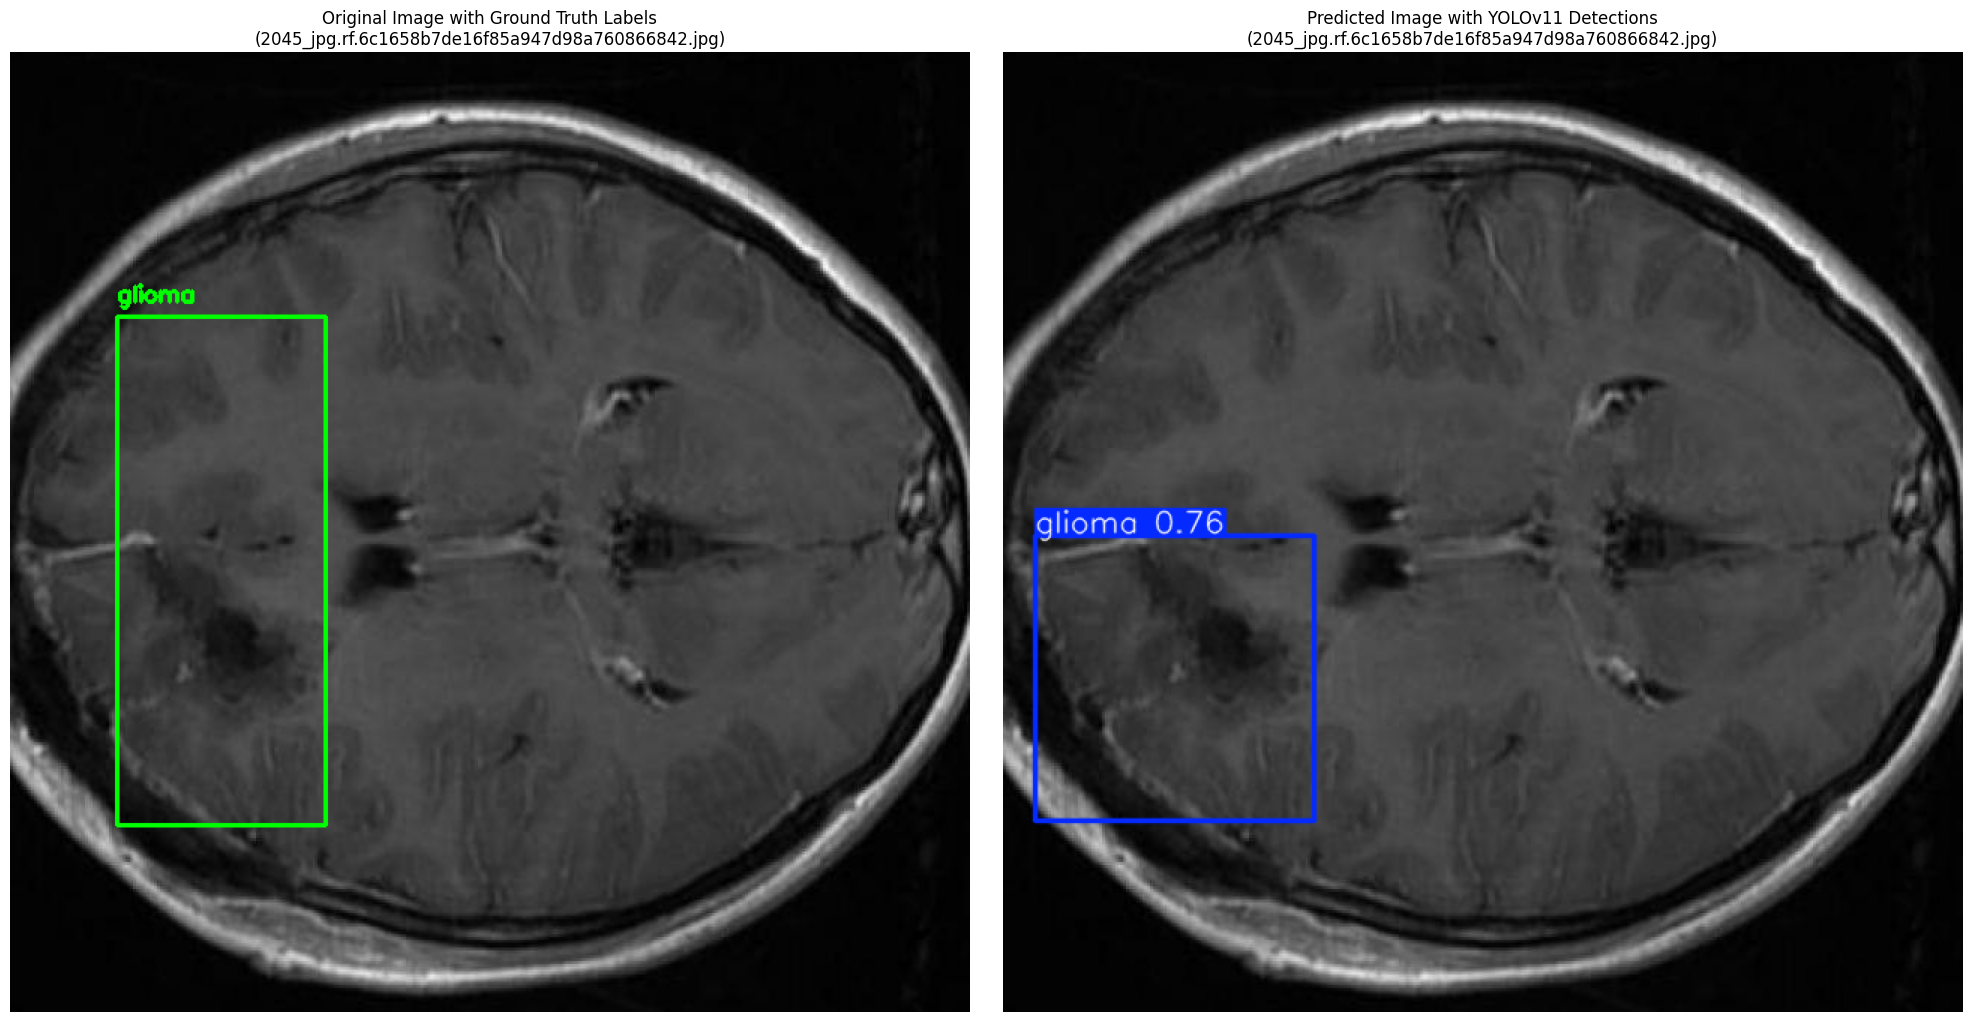


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1951_jpg.rf.eb08d051c58cf70408f3def1b2f274de.jpg: 640x640 1 glioma, 5.7ms
Speed: 0.8ms preprocess, 5.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


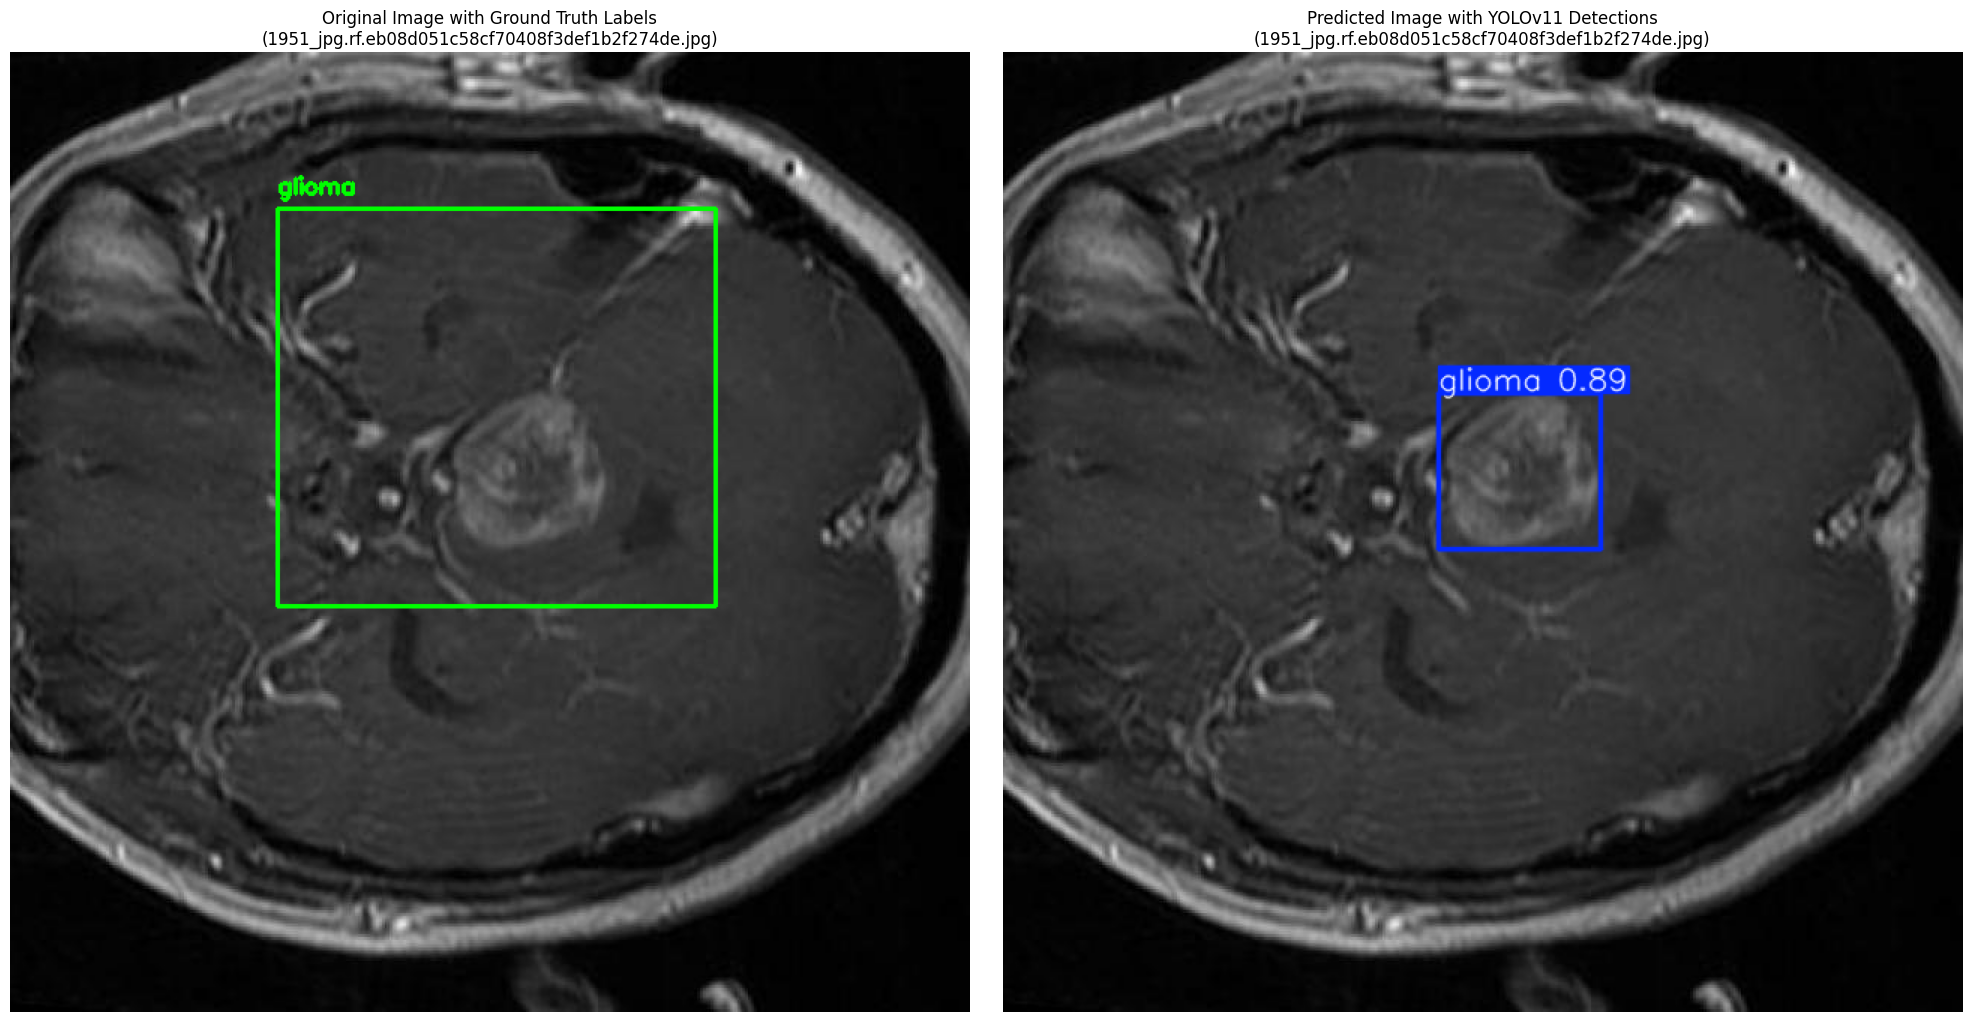


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1710_jpg.rf.36fe9d822cf5079600022f12aa2d0f3a.jpg: 640x640 1 pituitary, 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


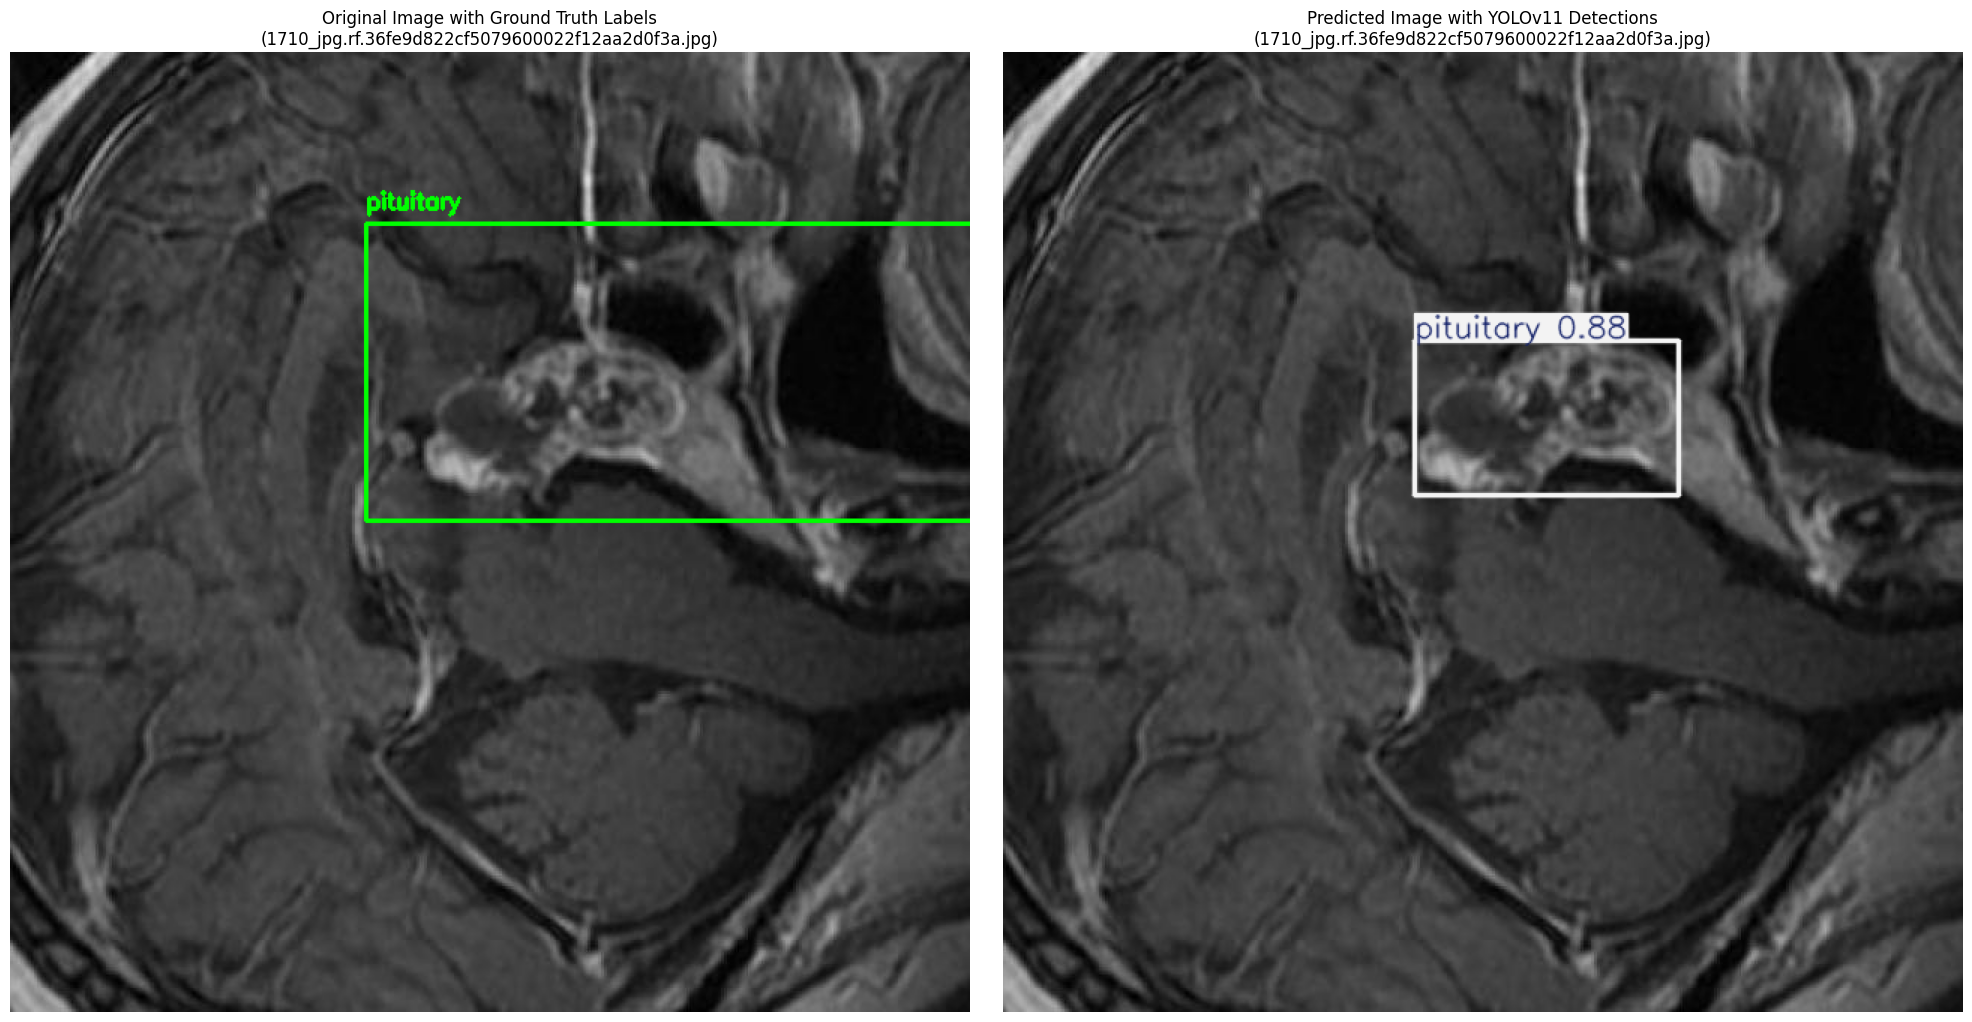


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/192_jpg.rf.8b107bb6b8fc883d1a0ae0cf4a5a330e.jpg: 640x640 1 meningioma, 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


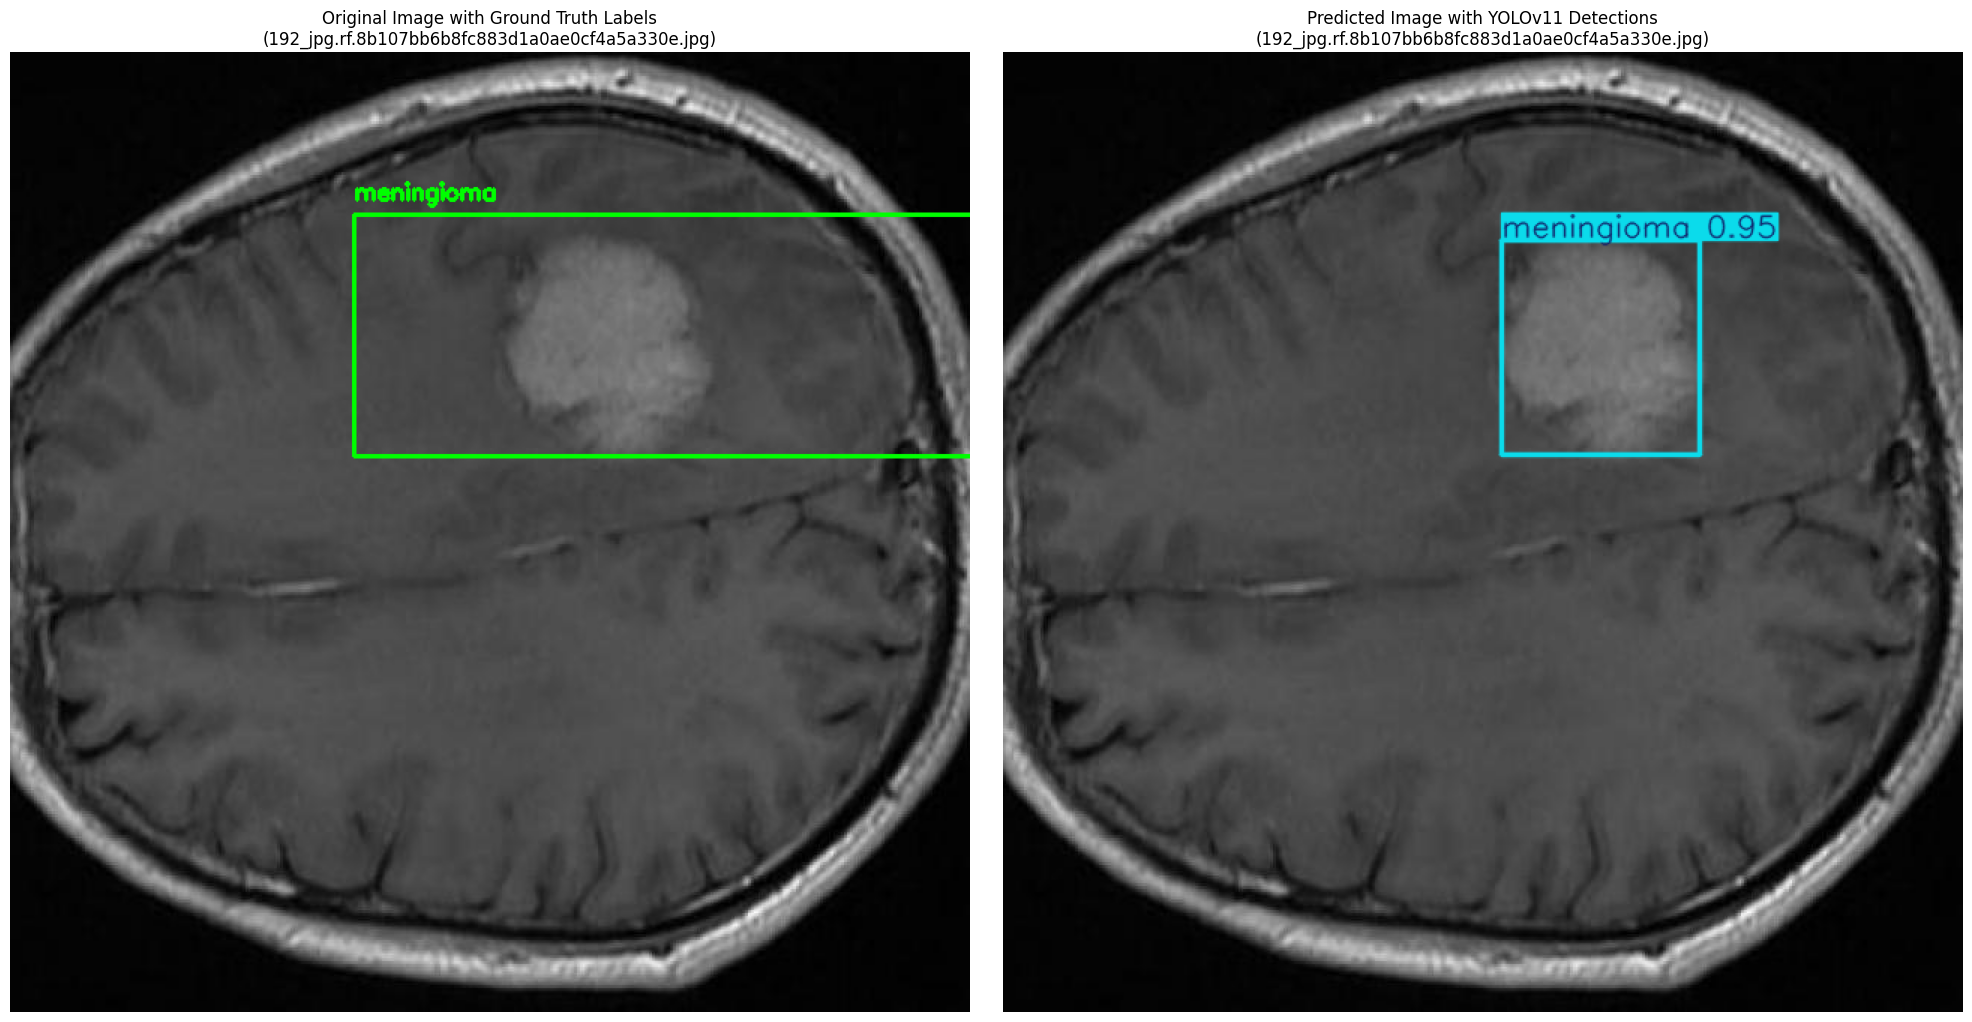


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2781_jpg.rf.175843f75a531e87b7bd8bb7eed737f8.jpg: 640x640 1 glioma, 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


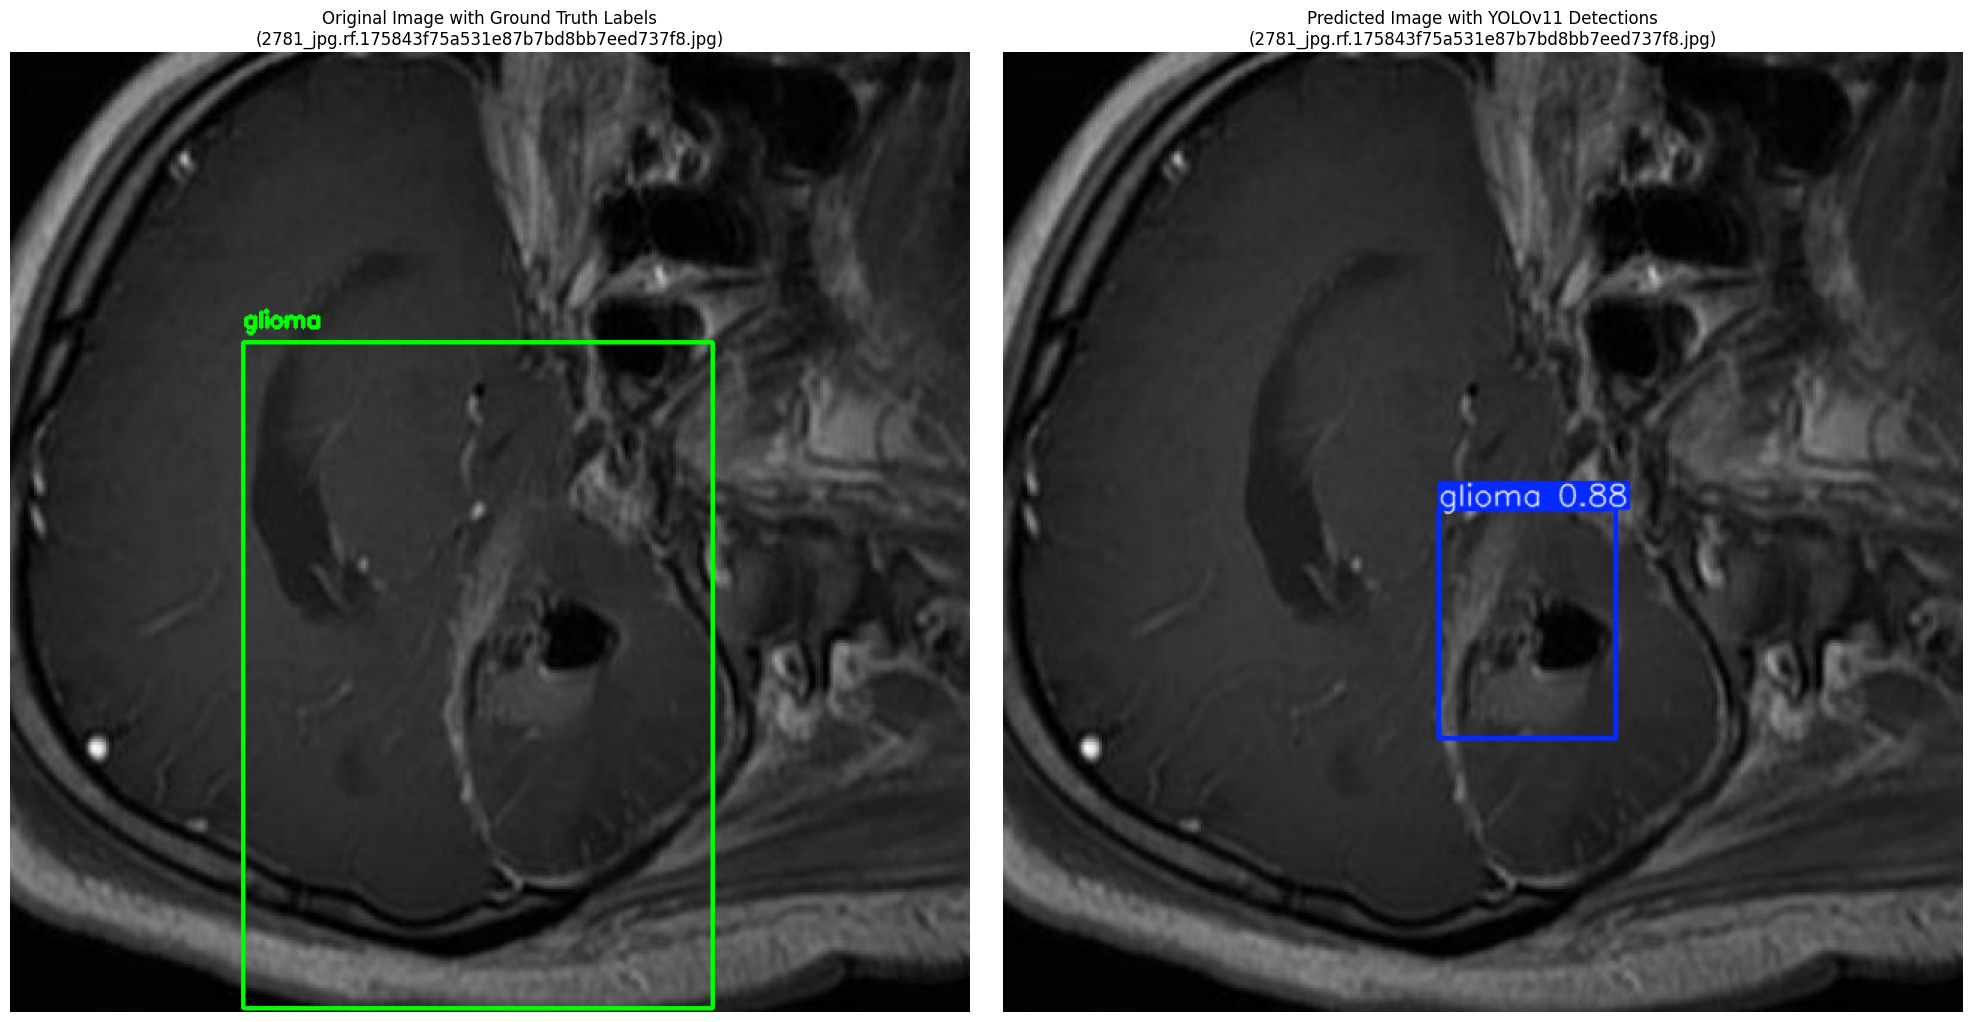


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2904_jpg.rf.cbc4872603a5087d632f8ae70af6dfe9.jpg: 640x640 1 glioma, 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


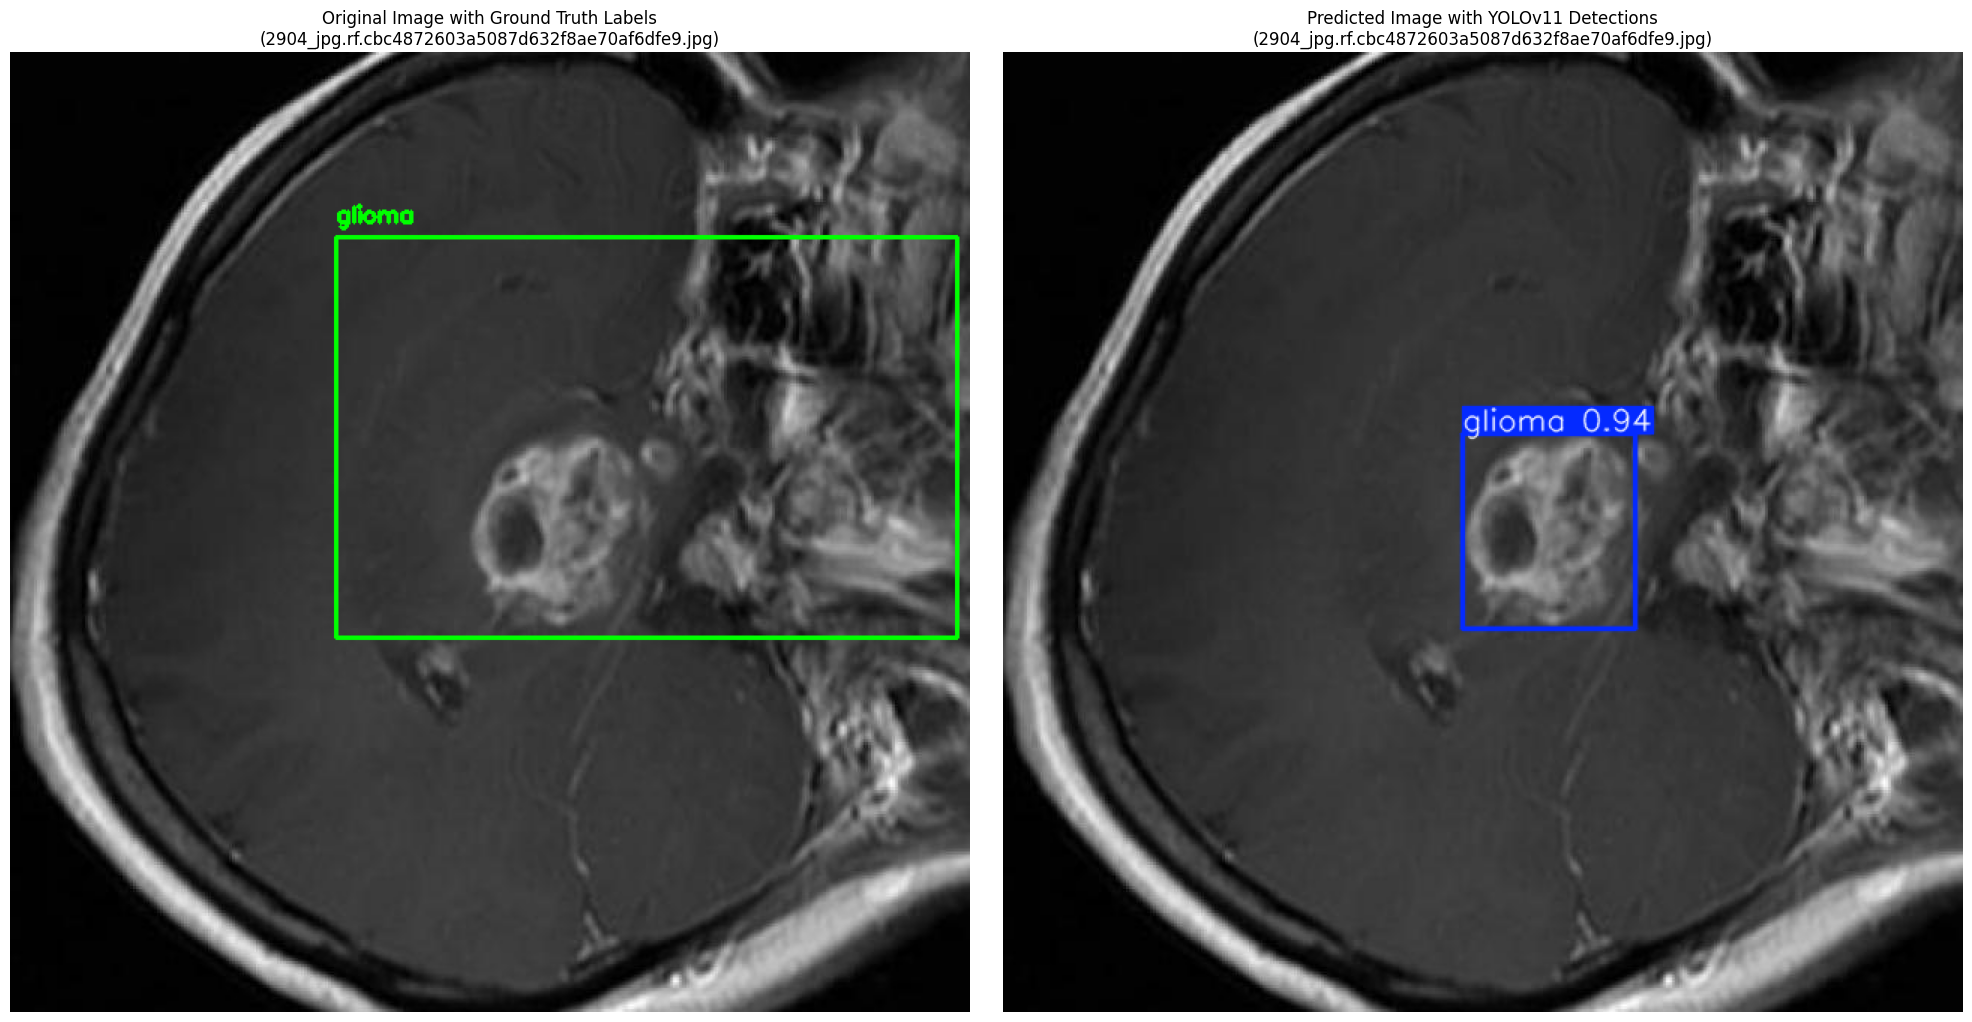


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/571_jpg.rf.ed65129e8c11ba5cc4761d5fbee49eff.jpg: 640x640 1 meningioma, 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


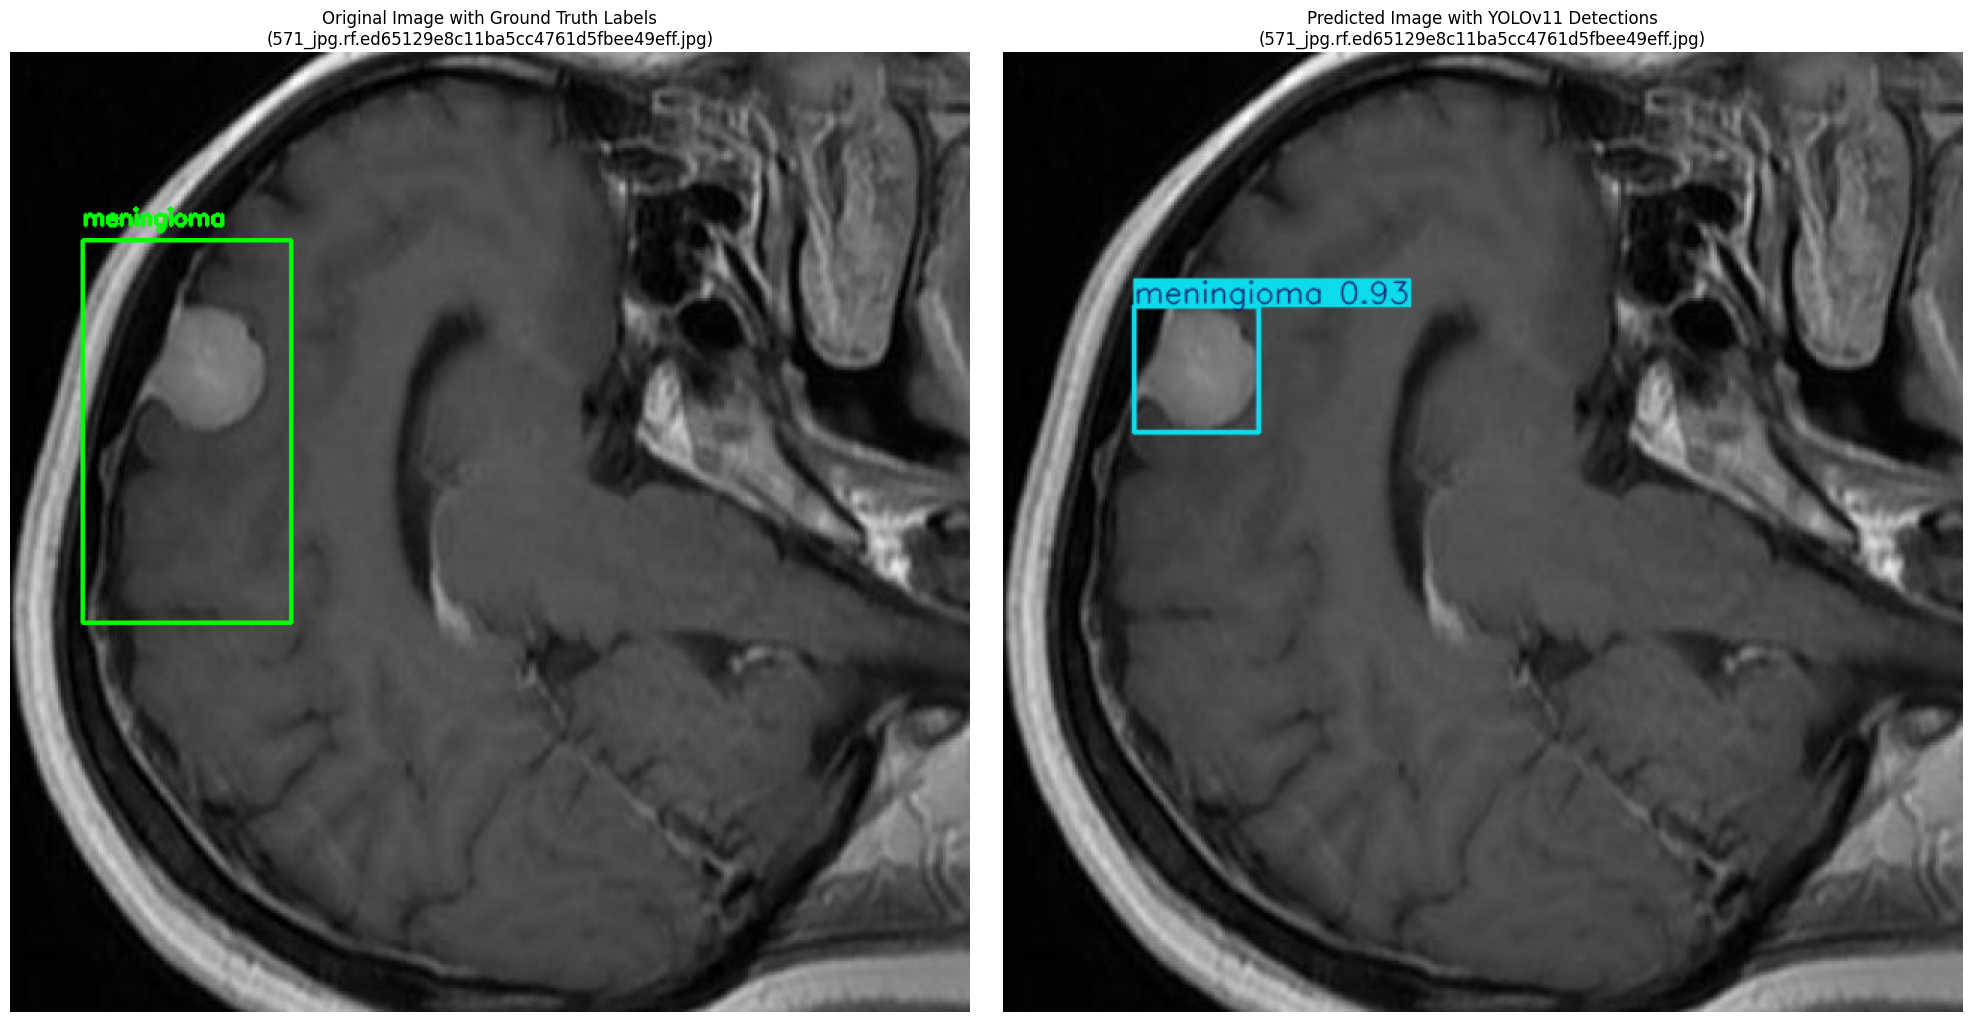


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg: 640x640 1 pituitary, 5.5ms
Speed: 0.9ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


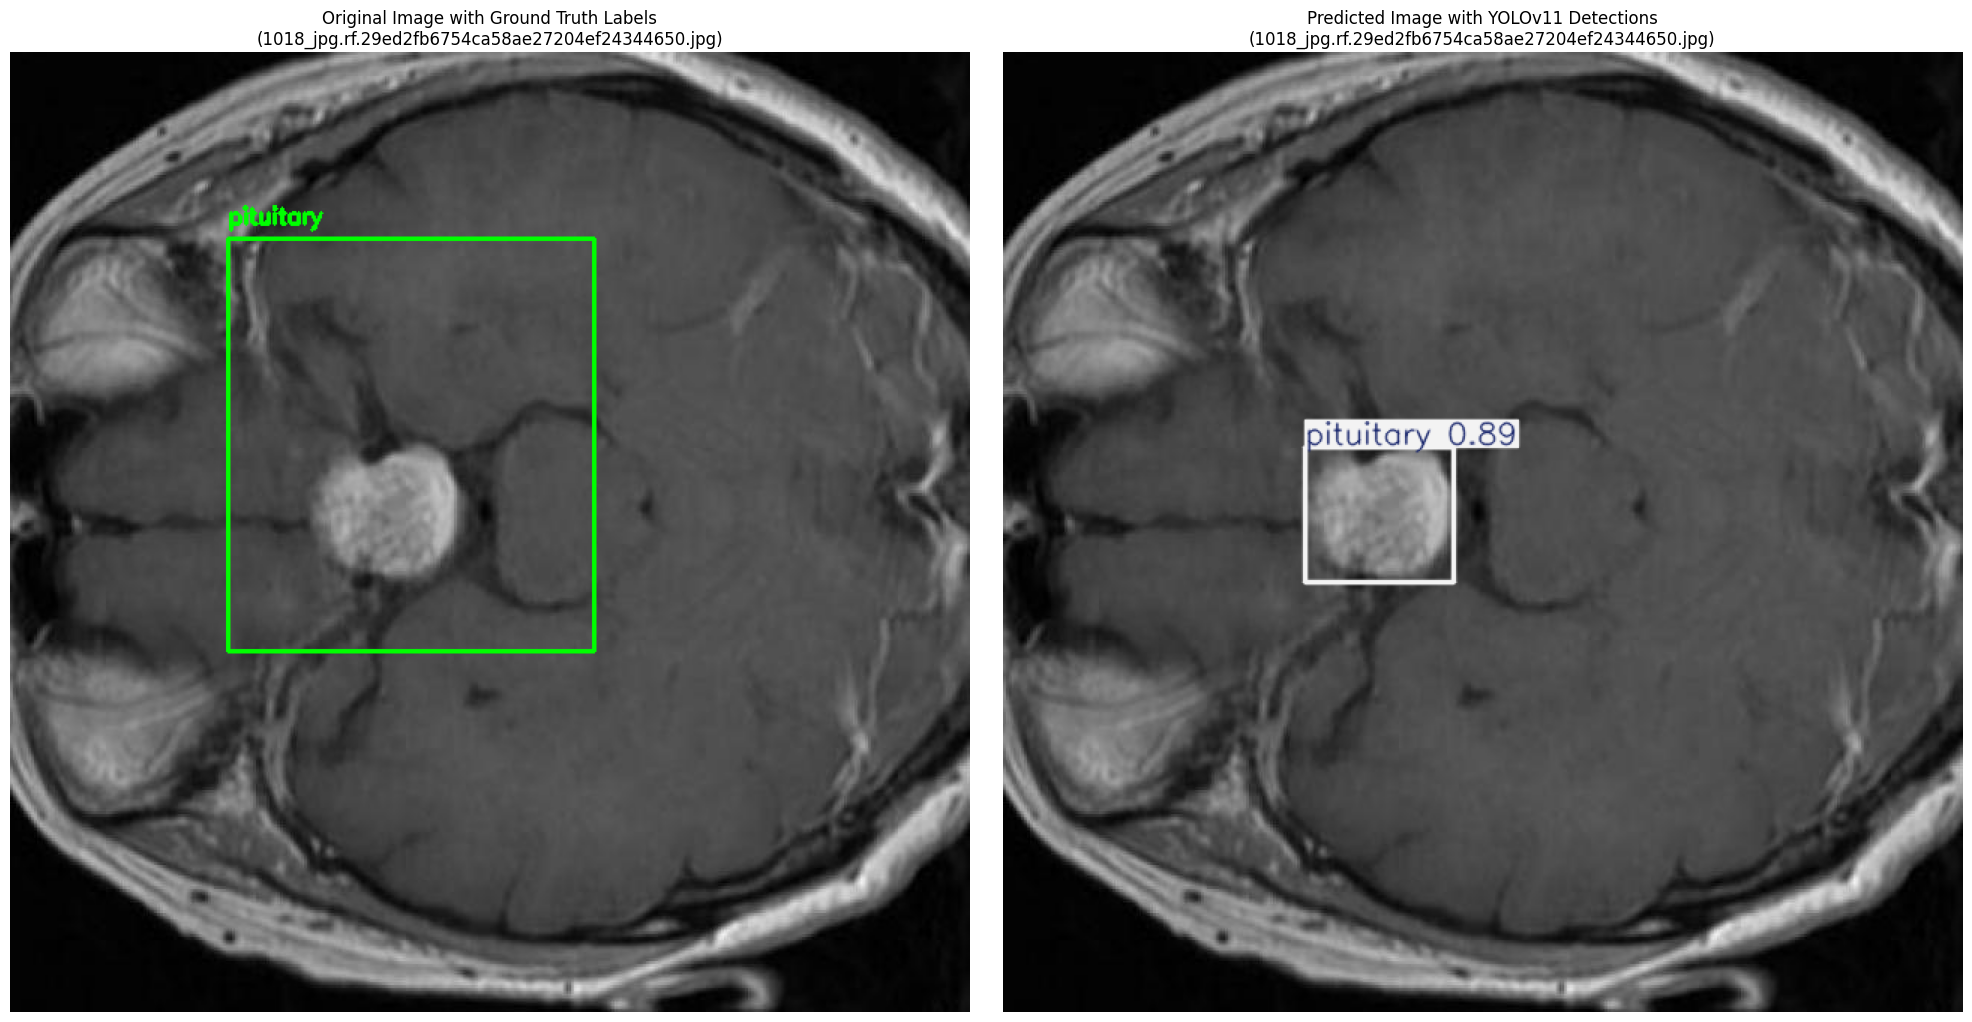


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1583_jpg.rf.ea41474e5ffc139718847dffa4d8c2ee.jpg: 640x640 1 pituitary, 5.1ms
Speed: 0.8ms preprocess, 5.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


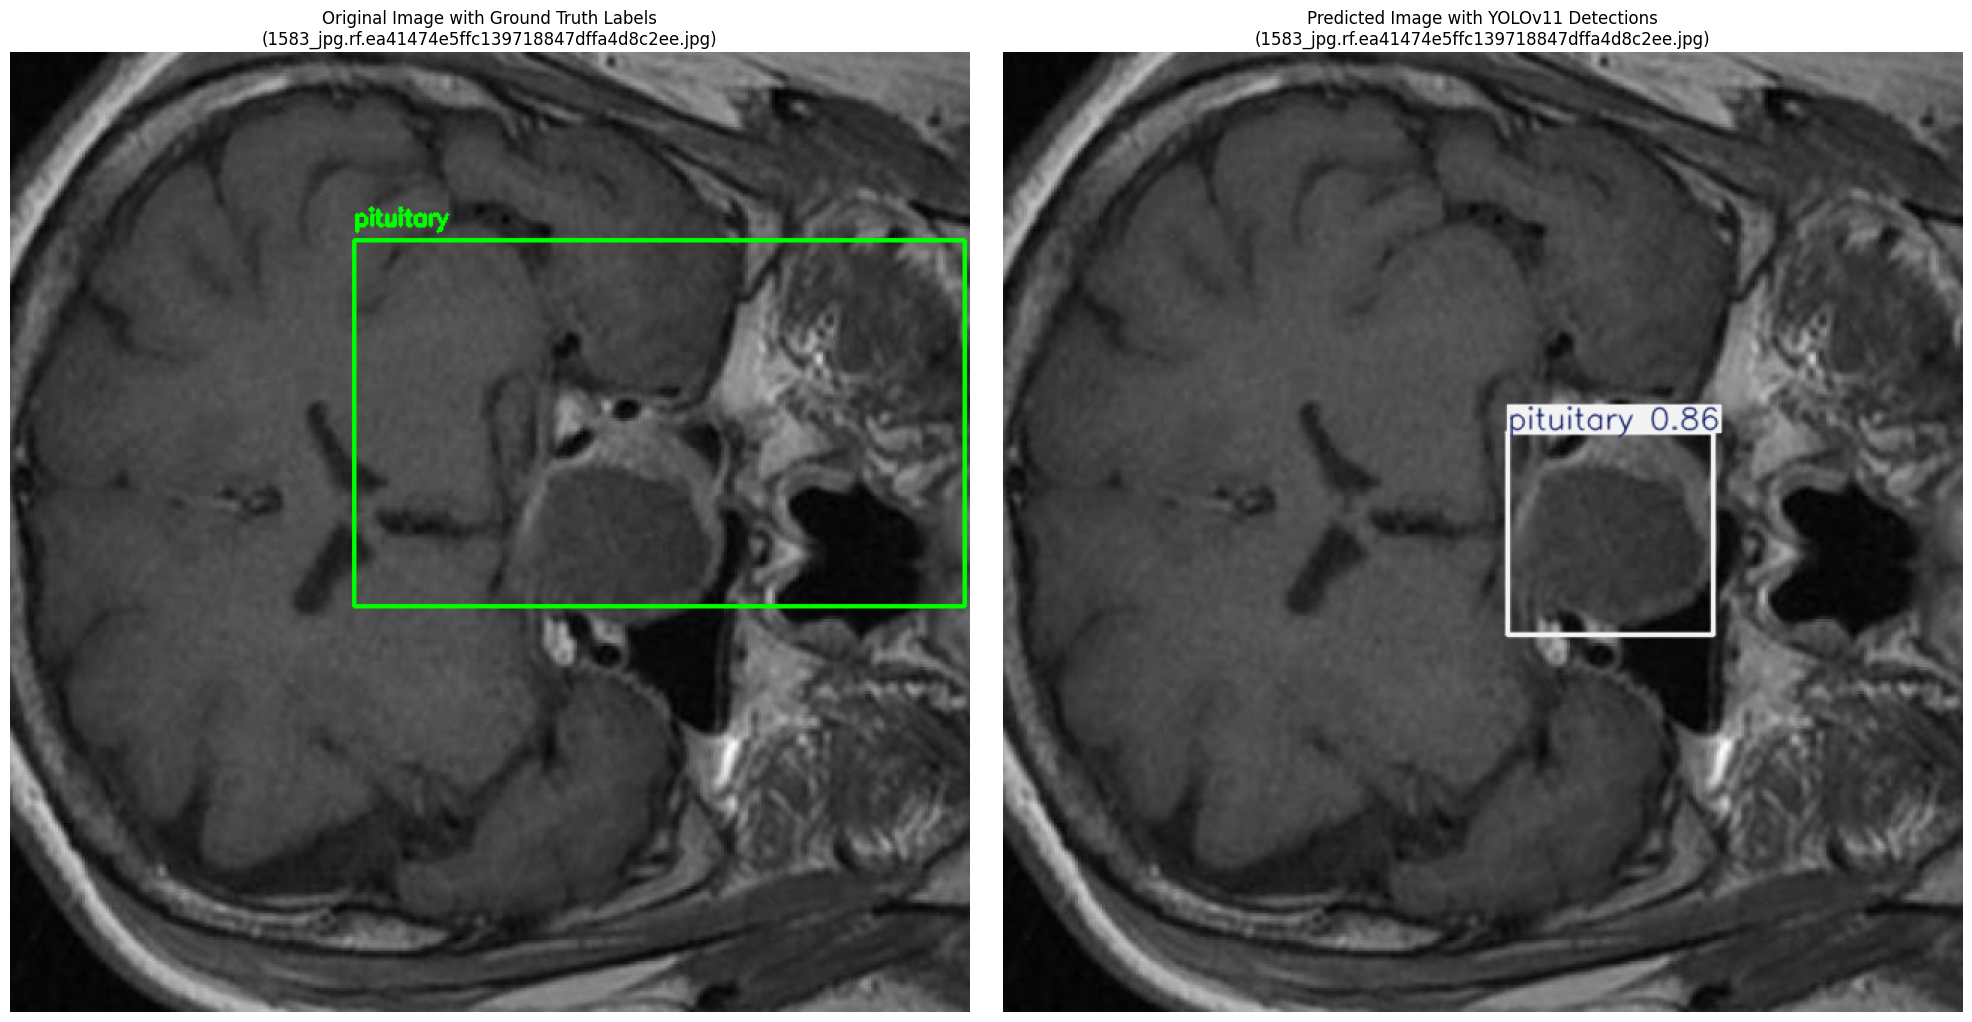


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/38_jpg.rf.1a9b0715faf5528bc2070c2b8e786241.jpg: 640x640 1 meningioma, 1 pituitary, 5.2ms
Speed: 0.8ms preprocess, 5.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


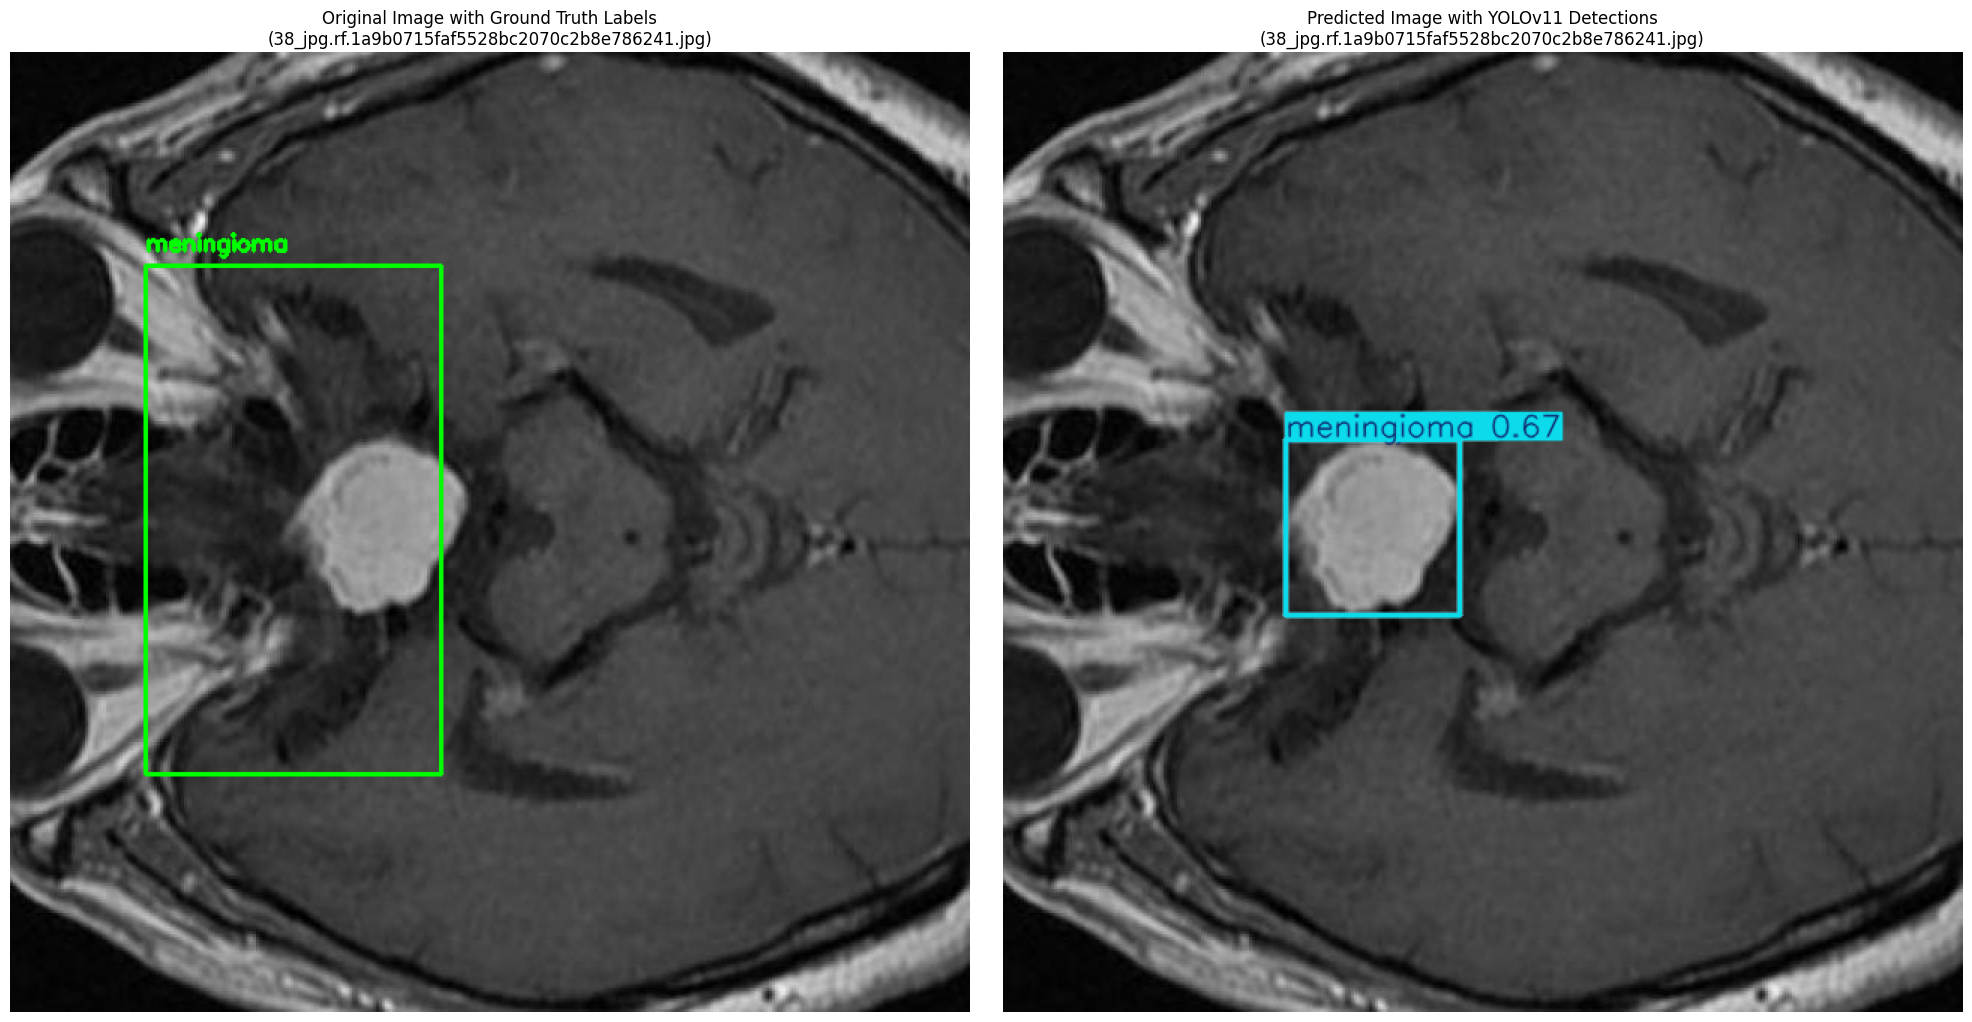

In [8]:
%matplotlib inline
for img_path in test_image_files:
    img_filename = os.path.basename(img_path)
    img_name_no_ext = os.path.splitext(img_filename)[0]
    label_path = os.path.join(TEST_LABELS_DIR, img_name_no_ext + '.txt')

    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    ground_truth_annotations = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                ground_truth_annotations.append(parts)

    ground_truth_image_display = draw_annotations(original_image.copy(), ground_truth_annotations, class_names, color=(0, 255, 0), is_gt=True)

    prediction_results = trained_model.predict(
        source=img_path,
        imgsz=IMG_SIZE,
        conf=CONF_THRESHOLD,
        # iou=IOU_THRESHOLD,
        # save=True,
        # save_txt=True,
        project=PREDICT_PROJECT_NAME,
        name=PREDICT_RUN_NAME,
        exist_ok=True
    )

    predicted_image_path_in_runs = os.path.join(PREDICT_PROJECT_NAME, PREDICT_RUN_NAME, img_filename)

    if os.path.exists(predicted_image_path_in_runs):
        predicted_image_display = cv2.imread(predicted_image_path_in_runs)
        predicted_image_display = cv2.cvtColor(predicted_image_display, cv2.COLOR_BGR2RGB)
    else:
        print(f"Warning: Predicted image not found at {predicted_image_path_in_runs}. Plotting from results.")
        if prediction_results:
            r = prediction_results[0]
            im_np = r.plot()
            predicted_image_display = cv2.cvtColor(im_np, cv2.COLOR_BGR2RGB)
        else:
            predicted_image_display = np.zeros_like(original_image)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(ground_truth_image_display)
    axes[0].set_title(f'Original Image with Ground Truth Labels\n({img_filename})')
    axes[0].axis('off')

    axes[1].imshow(predicted_image_display)
    axes[1].set_title(f'Predicted Image with YOLOv11 Detections\n({img_filename})')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()